In [11]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Summary

**1 – Building some useful functions**

- 1.1 – Regular polygon with $n$ vertices
- 1.2 – Random generation of the first point of the chaos game
- 1.3 – Generation of a matrix containing every points

**2 – Let's visualise the chaos !**

# 1 – Building some useful functions

### 1.1 – Regular polygon with $n$ vertices

In [12]:
def polygon(n):
    
    vertices = np.zeros((2, n))
    theta = 2*np.pi/n #angle
    for i in range(n):
        vertices[0, i] = np.cos(theta*i)
        vertices[1, i] = np.sin(theta*i)
        
    A = np.array([[0, -1], [1, 0]]) #just rotating the polygon
    return A @ vertices

### 1.2 – Random generation of the first point of the chaos game

To do so, we generate a point inside the largest circle included in every polygon of size $n \geq 3$. The position of the first point doesn't really matter, we just need to put it inside our polygon.

In [13]:
def random_point():
    
    x = np.random.uniform() * 1/2
    y = np.random.uniform() * 1/2
    while x**2 + y**2 > 1/4 : #while the point is not in the circle
        x = np.random.uniform() * 1/2
        y = np.random.uniform() * 1/2

    return np.array([x, y])

### 1.3 – Generation of a matrix containing every points

The objective is to create a matrix $Z$ of size $(3, N)$ as follows:

$$ Z = \begin{pmatrix} x_0 & x_1 & \dots & x_N \\ y_0 & y_1 & \dots & y_N \\ n & c_1 & \dots & c_N \end{pmatrix} $$

- The first two rows contain the coordinates of all generated points.
- The last row indicates the color of the point, which is represented by the chosen vertex. Thus, we have:

$$ \forall i \in [1, 2, \dots, N], c_i \in [0, 1, \dots, n-1] $$

The *build_Z* function consider the **step of each iteration** and the **constraint** imposed.
- If *constraint* is 0 : there is no constraint.
- If *constraint* is 1 : a vertex can't be chosen twice in a row.
- If *constraint* is 2 : when a vertex is chosen, none of its neighbors can be chosen afterward.
- If *constraint* is 3 : if a vertex is chosen twice in a row, the next vertex can't be one of its neighbors.

In [14]:
def build_Z(n, n_iter, step, constraint):

    vertices = polygon(n)
    Z = np.zeros((3, n_iter))
    Z[[0,1], 0] = random_point() #first point
    Z[2, 0] = n #first color

    for i in range(n_iter-1):
        if constraint == 0 : #no constraint
                rdm = np.random.randint(n)

        elif constraint == 1: #a vertex can't be chosen twice in a row
            rdm = np.random.randint(n)
            while rdm == Z[2, i]:
                rdm = np.random.randint(n)


        elif constraint == 2: #when a vertex is chosen, none of its neighbors can be chosen afterward
            rdm = np.random.randint(n)
            while (rdm in [Z[2,i]-1, Z[2,i]+1]) or (rdm==0 and Z[2,i]==n-1) or (rdm==n-1 and Z[2,i]==0):
                rdm = np.random.randint(n)

        else: #constraint=3 / if a vertex is chosen twice in a row, the next vertex can't be one of its neighbors
            if i == 0: #first iteration => no constraint
                rdm = np.random.randint(n)
            else:
                rdm = np.random.randint(n)
                if Z[2, i-1] == Z[2, i]: #if a vertex is chosen twice in a row
                    while (rdm in [Z[2,i]-1, Z[2,i]+1]) or (rdm==0 and Z[2,i]==n-1) or (rdm==n-1 and Z[2,i]==0):
                        rdm = np.random.randint(n)

        rdm_vertex = vertices[:, rdm] #coordinates of the randomly chosen vertex 
        Z[[0, 1], i+1] = Z[[0, 1], i] + step * (rdm_vertex - Z[[0, 1], i]) #add new points (xi, yi)
        Z[2, i+1] = rdm #color ci
            
    return Z

# 2 – Let's visualise the chaos !

Here, we plot some chaos games, with different combinations of...
- $n$, the number of vertices.
- step, between 0 and 1.
- constraint (0, 1, 2 or 3).

We recall that :
- Constraint  0 : there is no constraint.
- Constraint 1 : a vertex can't be chosen twice in a row.
- Constraint 2 : when a vertex is chosen, none of its neighbors can be chosen afterward.
- Constraint 3 : if a vertex is chosen twice in a row, the next vertex can't be one of its neighbors.

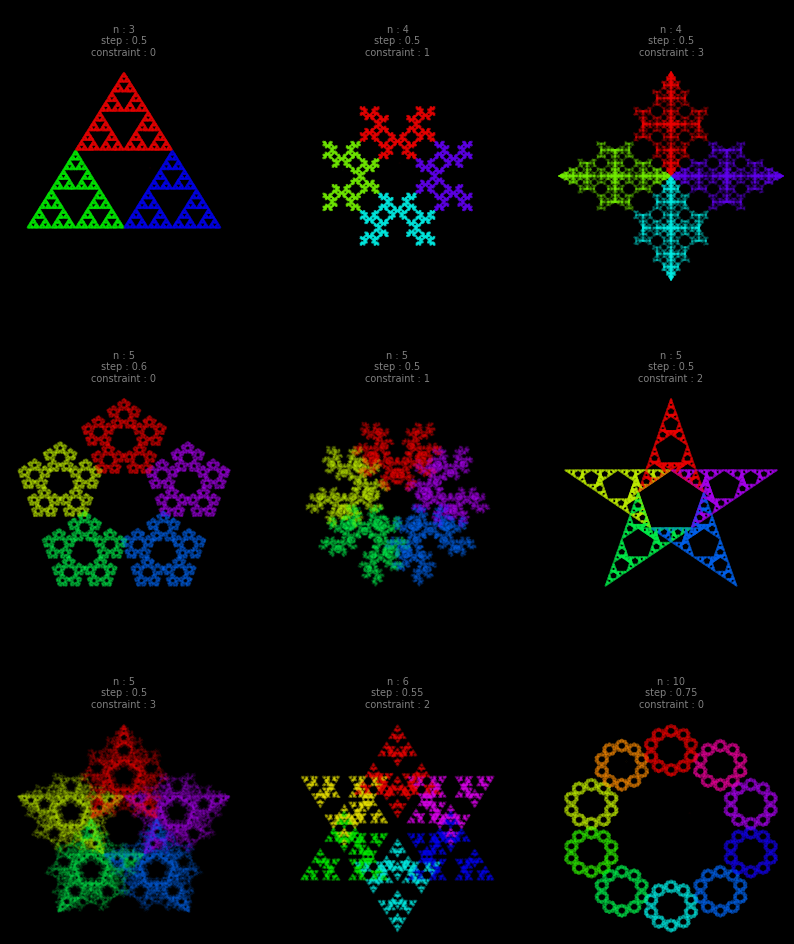

In [15]:
list_n = [3, 4, 4, 5, 5, 5, 5, 6, 10]
n_iter = 10**5
list_step = [0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.55, 0.75]
list_constraint = [0, 1, 3, 0, 1, 2, 3, 2, 0]

#parameters of the figure
plt.style.use('dark_background')
fig, AX = plt.subplots(3, 3, figsize=(10, 12))
for ax in AX.flatten():
    ax.set_xticks([]) ; ax.set_xlim(-1.02, 1.02)
    ax.set_yticks([]) ; ax.set_ylim(-1.02, 1.6)
    for var in ['top', 'bottom', 'left', 'right']:
        ax.spines[var].set_color('black')

for i, ax in enumerate(AX.flatten()):
    n = list_n[i]
    step = list_step[i]
    constraint = list_constraint[i]
    Z = build_Z(n, n_iter, step, constraint)
    X, Y, color = Z[0, :], Z[1, :], Z[2, :]
    color[0] = n

    ax.scatter(X, Y, s=0.0005, c=color, cmap="hsv")

    text = "n : " + str(n) + "\nstep : " + str(step) + "\nconstraint : " + str(constraint) 
    #printing the combination used
    ax.text(0., 1.3, text, fontsize=7, horizontalalignment="center", verticalalignment="center", alpha=0.5)

plt.plot()
fig.savefig("fractals.png", dpi=1000)